In [1]:
import pandas as pd
# import lightgbm as lgb
# import xgboost as xgb
# from catboost import CatBoostClassifier, Pool
#from metrics import  accuracy
import numpy as np
import matplotlib.cm
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel, RFE, VarianceThreshold, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from final_model_training import *
import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=RuntimeWarning) 
simplefilter("ignore", category=UserWarning)

In [2]:
RANDOM_STATE = 42

x_train_path = "data/x_train.txt"
y_train_path = "data/y_train.txt"

x_test_path = "data/x_test.txt"


X = pd.read_csv(x_train_path, delim_whitespace=True, header=None)
y = pd.read_csv(y_train_path, delim_whitespace=True, header=None)
X_real_test = pd.read_csv(x_test_path, delim_whitespace=True, header=None)

C:\Users\czerw\AppData\Local\Temp\ipykernel_23168\1202793571.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(x_train_path, delim_whitespace=True, header=None)
C:\Users\czerw\AppData\Local\Temp\ipykernel_23168\1202793571.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(y_train_path, delim_whitespace=True, header=None)
C:\Users\czerw\AppData\Local\Temp\ipykernel_23168\1202793571.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_real_test = pd.read_csv(x_test_path, delim_whitespace=True, header=None)


# Ensembling

## Option A

In [19]:
XA = X[[100,102,105]]

In [20]:
xgb_params_A = {'colsample_bytree': 0.5307786809163018,
  'eta': 0.013200015577644199,
  'gamma': 3.3403122511768517,
  'max_depth': 9,
  'min_child_weight': 2,
  'n_estimators': 105,
  'reg_lambda': 0.2343443736214615,
  'verbosity': 0}

lgbm_params_A ={'colsample_bytree': 0.6489567476794972,
  'learning_rate': 0.25379898942316537,
  'min_child_weight': 10,
  'n_estimators': 145,
  'num_leaves': 2,
  'reg_lambda': 0.09233298220540166,
  'verbosity': -1}

In [21]:
models = {"XGB": XGBClassifier(**xgb_params_A), 
          "LGBM": LGBMClassifier(**lgbm_params_A),
          "SVM": SVC(kernel='rbf', probability=True),
          "QDA": QuadraticDiscriminantAnalysis(reg_param=0.4),
          "NB": GaussianNB()}

In [22]:
model_combinations = []
for r in range(1, len(models) + 1):
    model_combinations.extend(combinations(models.keys(), r))
model_grid_params = {}
for combination in model_combinations:
    key = "_".join(combination)
    value = [models[model_name] for model_name in combination]
    model_grid_params[key] = value

In [23]:
cv = 5
results_dict_A = run_grid_search_cv(model_grid_params, XA, y, profit_scoring, 5)

XGB
Running on: XGB
LGBM
Running on: LGBM
SVM
Running on: SVM
QDA
Running on: QDA
NB
Running on: NB
XGB_LGBM
Running on: XGB_LGBM
XGB_SVM
Running on: XGB_SVM
XGB_QDA
Running on: XGB_QDA
XGB_NB
Running on: XGB_NB
LGBM_SVM
Running on: LGBM_SVM
LGBM_QDA
Running on: LGBM_QDA
LGBM_NB
Running on: LGBM_NB
SVM_QDA
Running on: SVM_QDA
SVM_NB
Running on: SVM_NB
QDA_NB
Running on: QDA_NB
XGB_LGBM_SVM
Running on: XGB_LGBM_SVM
XGB_LGBM_QDA
Running on: XGB_LGBM_QDA
XGB_LGBM_NB
Running on: XGB_LGBM_NB
XGB_SVM_QDA
Running on: XGB_SVM_QDA
XGB_SVM_NB
Running on: XGB_SVM_NB
XGB_QDA_NB
Running on: XGB_QDA_NB
LGBM_SVM_QDA
Running on: LGBM_SVM_QDA
LGBM_SVM_NB
Running on: LGBM_SVM_NB
LGBM_QDA_NB
Running on: LGBM_QDA_NB
SVM_QDA_NB
Running on: SVM_QDA_NB
XGB_LGBM_SVM_QDA
Running on: XGB_LGBM_SVM_QDA
XGB_LGBM_SVM_NB
Running on: XGB_LGBM_SVM_NB
XGB_LGBM_QDA_NB
Running on: XGB_LGBM_QDA_NB
XGB_SVM_QDA_NB
Running on: XGB_SVM_QDA_NB
LGBM_SVM_QDA_NB
Running on: LGBM_SVM_QDA_NB
XGB_LGBM_SVM_QDA_NB
Running on: XGB_LGBM

In [24]:
results_dict_mean_A = apply_transform_to_res(results_dict_A, np.mean)
results_dict_std_A = apply_transform_to_res(results_dict_A, np.std)

sorted_mean_A = dict(sorted(results_dict_mean_A.items(), key=lambda item: item[1]))
sorted_std_A = dict(sorted(results_dict_std_A.items(), key=lambda item: item[1]))

ordered_std_values_A = [results_dict_std_A[key] for key in sorted_mean_A.keys()]

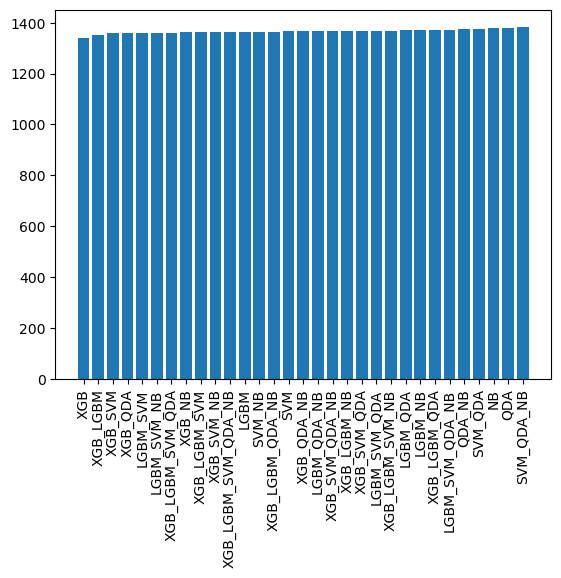

In [25]:
plt.bar(sorted_mean_A.keys(), sorted_mean_A.values())
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

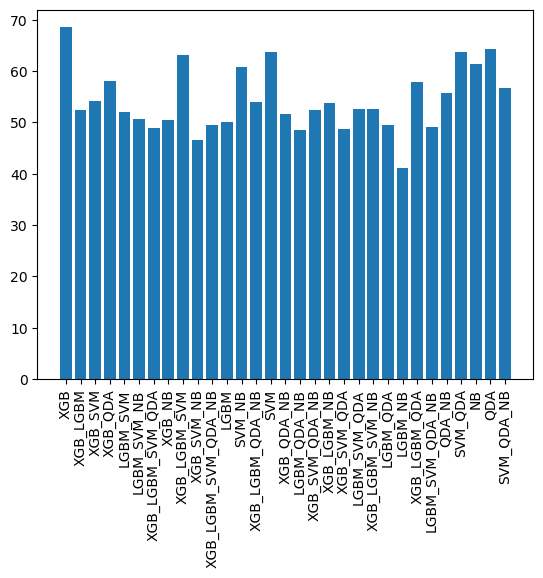

In [26]:
plt.bar(sorted_mean_A.keys(), ordered_std_values_A)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [29]:
top5_A = pd.DataFrame(index=sorted_mean_A.keys(), data={"mean": sorted_mean_A.values(), "std": ordered_std_values_A}).tail(5)
top5_A.iloc[::-1]

,mean,std
SVM_QDA_NB,1382.0,56.709788
QDA,1380.0,64.187226
NB,1378.0,61.449166
SVM_QDA,1376.0,63.749510
QDA_NB,1374.0,55.713553


## Option B

In [5]:
XB = X[[100,102,103,105]]

In [40]:
xgb_params_B = {'colsample_bytree': 0.7302911006868942,
  'eta': 0.18555806381349182,
  'gamma': 1.0024822308240562,
  'max_depth': 1,
  'min_child_weight': 6,
  'n_estimators': 270,
  'reg_lambda': 0.6106136132482625,
  'verbosity': 0}
lgbm_params_B = {'colsample_bytree': 0.7261012873090305,
  'learning_rate': 0.049729706840266195,
  'min_child_weight': 8,
  'n_estimators': 230,
  'num_leaves': 4,
  'reg_lambda': 0.42480281899717687,
  'verbosity': -1}

In [6]:
models = {"XGB": XGBClassifier(**xgb_params_B), 
          "LGBM": LGBMClassifier(**lgbm_params_B),
          "SVM": SVC(kernel='rbf', probability=True),
          "QDA": QuadraticDiscriminantAnalysis(reg_param=0.4),
          "NB": GaussianNB()}

In [7]:
model_combinations = []
for r in range(1, len(models) + 1):
    model_combinations.extend(combinations(models.keys(), r))
model_grid_params = {}
for combination in model_combinations:
    key = "_".join(combination)
    value = [models[model_name] for model_name in combination]
    model_grid_params[key] = value

In [8]:
cv = 5
results_dict_B = run_grid_search_cv(model_grid_params, XB, y, profit_scoring, 5)

XGB
Running on: XGB
LGBM
Running on: LGBM
SVM
Running on: SVM
QDA
Running on: QDA
NB
Running on: NB
XGB_LGBM
Running on: XGB_LGBM
XGB_SVM
Running on: XGB_SVM
XGB_QDA
Running on: XGB_QDA
XGB_NB
Running on: XGB_NB
LGBM_SVM
Running on: LGBM_SVM
LGBM_QDA
Running on: LGBM_QDA
LGBM_NB
Running on: LGBM_NB
SVM_QDA
Running on: SVM_QDA
SVM_NB
Running on: SVM_NB
QDA_NB
Running on: QDA_NB
XGB_LGBM_SVM
Running on: XGB_LGBM_SVM
XGB_LGBM_QDA
Running on: XGB_LGBM_QDA
XGB_LGBM_NB
Running on: XGB_LGBM_NB
XGB_SVM_QDA
Running on: XGB_SVM_QDA
XGB_SVM_NB
Running on: XGB_SVM_NB
XGB_QDA_NB
Running on: XGB_QDA_NB
LGBM_SVM_QDA
Running on: LGBM_SVM_QDA
LGBM_SVM_NB
Running on: LGBM_SVM_NB
LGBM_QDA_NB
Running on: LGBM_QDA_NB
SVM_QDA_NB
Running on: SVM_QDA_NB
XGB_LGBM_SVM_QDA
Running on: XGB_LGBM_SVM_QDA
XGB_LGBM_SVM_NB
Running on: XGB_LGBM_SVM_NB
XGB_LGBM_QDA_NB
Running on: XGB_LGBM_QDA_NB
XGB_SVM_QDA_NB
Running on: XGB_SVM_QDA_NB
LGBM_SVM_QDA_NB
Running on: LGBM_SVM_QDA_NB
XGB_LGBM_SVM_QDA_NB
Running on: XGB_LGBM

In [30]:
results_dict_mean_B = apply_transform_to_res(results_dict_B, np.mean)
results_dict_std_B = apply_transform_to_res(results_dict_B, np.std)

In [31]:
sorted_mean_B = dict(sorted(results_dict_mean_B.items(), key=lambda item: item[1]))
sorted_std_B = dict(sorted(results_dict_std_B.items(), key=lambda item: item[1]))

In [33]:
ordered_std_values_B = [results_dict_std_B[key] for key in sorted_mean_B.keys()]

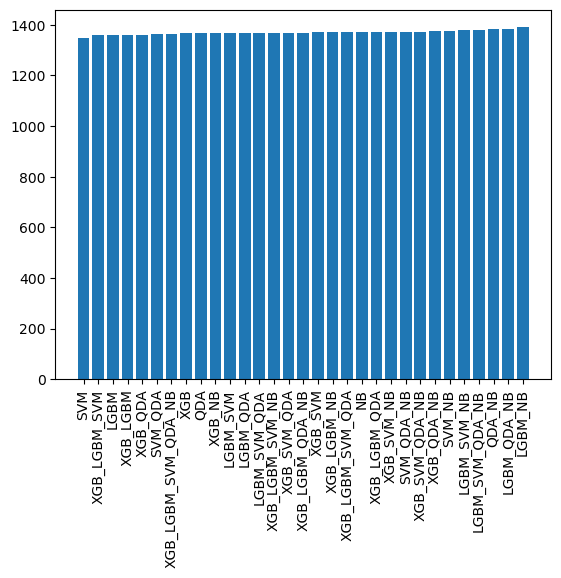

In [34]:
plt.bar(sorted_mean_B.keys(), sorted_mean_B.values())
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

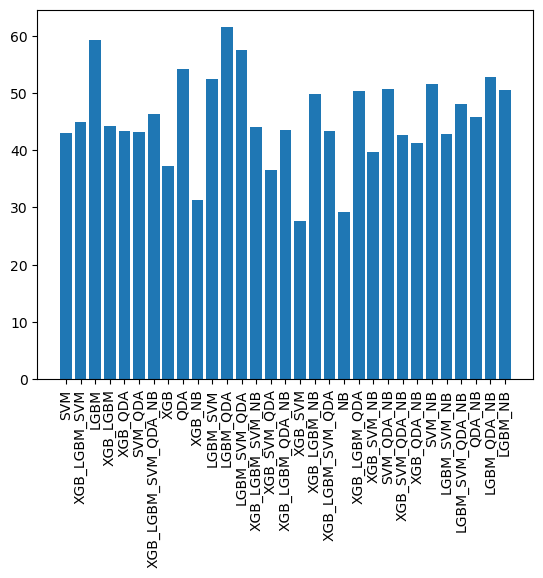

In [35]:
plt.bar(sorted_mean_B.keys(), ordered_std_values_B)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [36]:
top5_B = pd.DataFrame(index=sorted_mean_B.keys(), data={"mean": sorted_mean_B.values(), "std": ordered_std_values_B}).tail(5)
top5_B.iloc[::-1]

,mean,std
LGBM_NB,1390.0,50.596443
LGBM_QDA_NB,1384.0,52.763624
QDA_NB,1384.0,45.869380
LGBM_SVM_QDA_NB,1380.0,48.166378
LGBM_SVM_NB,1380.0,42.895221


In [39]:
pd.DataFrame(index=['NB'], data={'mean': results_dict_mean_B['NB'], 'std': results_dict_std_B['NB']})

,mean,std
NB,1372.0,29.257478


# Final

In [41]:

X_final = X[[100,102,103,105]]
X_real_test_final = X_real_test[[100,102,103,105]]

model_set = [
        #QuadraticDiscriminantAnalysis(reg_param=0.4),
        #XGBClassifier(**xgb_params),
        LGBMClassifier(**lgbm_params_B),
        GaussianNB(),
        # SVC(kernel='linear', probability=True),
]

train_and_predict_final_model(model_set, X_final, y, X_real_test_final)

,preds,id
3249,0.968167,3249
3884,0.960247,3884
4001,0.958191,4001
2285,0.951573,2285
749,0.942826,749
...,...,...
1272,0.646952,1272
2212,0.646852,2212
2012,0.646773,2012
4172,0.646717,4172
